# HVAC optimization case study
## Validation

### Setup

In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from pathlib import Path
import pandas as pd
import matplotlib as mpl
import mlflow
import mlflow.sklearn
from sklearn.metrics import classification_report, accuracy_score, f1_score, plot_confusion_matrix

In [5]:
root_path = Path.cwd().parent
processed_data_path = root_path.joinpath("data/processed")
model_path = root_path.joinpath("models")
figure_path = root_path.joinpath("references/figures")

In [8]:
mpl.style.use("seaborn-colorblind")
mpl.rcParams.update({
    "axes.labelsize": "large",
    "axes.titlesize": "xx-large",
    "xtick.labelsize": "large",
    "ytick.labelsize": "large",
    "axes.grid": False})

### Load data

In [9]:
val_df = pd.read_csv(processed_data_path.joinpath("valid_processed.csv"))

### Preprocessing

In [11]:
target = "occupancy"
date_features = ["year", "month", "day", "weekday", "hour", "minute", "week"]
org_features = ["temperature", "humidity", "light", "humidityratio"] 
all_features = [col for col in val_df.columns if col != target]
bool_features = [feat for feat in val_df[all_features] if val_df[feat].dtype == "bool"]

In [12]:
X_valid = val_df.drop(columns=target)
y_valid = val_df[target]

### Load model

In [13]:
model = mlflow.sklearn.load_model(f"{model_path.joinpath('tree_limited')}")

### Validate

In [14]:
y_pred = model.predict(X_valid[org_features])

In [15]:
print(f"Accuracy: {accuracy_score(y_valid, y_pred):.2f}",
      f"F1-score: {f1_score(y_valid, y_pred):.2f}", 
      classification_report(y_valid, y_pred),
      sep="\n")

Accuracy: 0.99
F1-score: 0.98
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7703
           1       0.97      0.99      0.98      2049

    accuracy                           0.99      9752
   macro avg       0.99      0.99      0.99      9752
weighted avg       0.99      0.99      0.99      9752



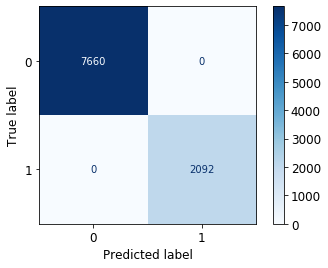

In [22]:
conf_plot = plot_confusion_matrix(model, X_valid[org_features], y_pred, cmap="Blues", values_format="d")
conf_plot.figure_.savefig(figure_path.joinpath("conf_matrix_plot_final_model.svg"), format="svg", dpi=150)